In [169]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad

In [170]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -70e-3 #V
V_L = -50e-3   #V
V_redef = -65e-3   #V
V0 = V_rep  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 25e-3    #s

t = np.arange(0, tmax, dt)
interacoes = round(tmax/dt)

In [171]:
def corrente(t, I):
    return I*(t>=0)



def trajetoria(V, I, sigma, intervalo):
    for i in range(interacoes-1):
        w_n = random.gauss(0,1)

        if V[i] == V_L:
            V[i+1] = V_redef
        else:
            V[i+1] = V[i] + (intervalo**2)/2 * ( (V_rep - V[i])/R*C + I[i]/C ) + sigma*w_n * (2/3) * intervalo**(3/2)

    return V

In [172]:
I = corrente(t, 300e-12)
V = np.zeros(interacoes)
sigma = 100e-3

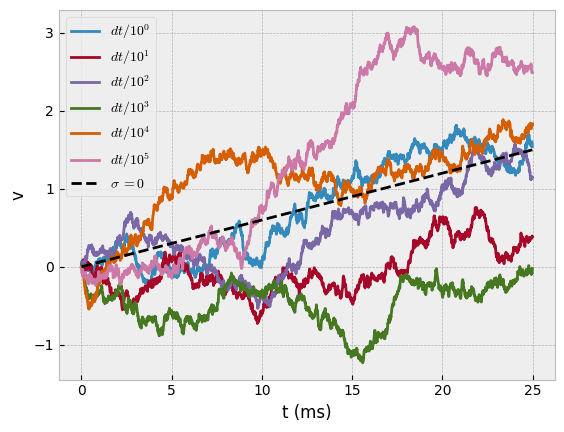

In [173]:
plt.style.use('bmh')

plt.figure()

for i in range(6):
    intervalo = dt * 10 ** -i
    v = trajetoria(V, I, sigma, intervalo=dt)
    plt.plot(t*1e3,v*1e7, label=rf'$dt/10^{i}$')


v = trajetoria(V, I, sigma=0, intervalo=dt)
plt.plot(t*1e3,v*1e7,'k--', label=rf'$\sigma\;=0$')


plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('v')

plt.show()
